In [1]:
import pycbc
import bilby
import numpy as np
import matplotlib.pylab as plt
import pycbc.psd


# Investigations

In [2]:
from tgrlensing.waveform_model import ModelGenericBeyondGRLensingBBH

In [3]:
waveform_arguments = dict(waveform_approximant='IMRPhenomXHM',
                          reference_frequency=20., minimum_frequency=20.)
sampling_frequency=2048
duration=8


In [4]:
t12_arr = [0.0,0.01,0.01]
lens_angle_arr = [np.pi/4,np.pi/4,1]#[np.pi/4,np.pi/4,np.pi/4]

In [5]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=ModelGenericBeyondGRLensingBBH,parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,waveform_arguments=waveform_arguments)

injection_parameters=dict(mass_1 = 38.3, mass_2 = 33.19, \
                          luminosity_distance = 2*558.553,\
                          dec = -1.223, ra = 2.269, theta_jn = 2.921,\
                          chi_1 = 0.3, chi_2 = 0.27, psi = 1.575,\
                          phase = 1.893,geocent_time = 1126259462.414,\
                          t12= 0,lens_angle= 0)


18:31 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: tgrlensing.waveform_model.ModelGenericBeyondGRLensingBBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
ifos1 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])

#set_strain_data_from_zero_noise
#set_strain_data_from_power_spectral_densities
ifos1.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=injection_parameters['geocent_time'] - 6)
ifos2.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=injection_parameters['geocent_time'] - 6)
ifos3.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=injection_parameters['geocent_time'] - 6)

injection_parameters['t12']=t12_arr[0]
injection_parameters['lens_angle'] = lens_angle_arr[0]
injection_1 = ifos1.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)
injection_parameters['t12']=t12_arr[1]
injection_parameters['lens_angle'] = lens_angle_arr[1]
injection_2 = ifos2.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)
injection_parameters['t12']=t12_arr[2]
injection_parameters['lens_angle'] = lens_angle_arr[2]
injection_3 = ifos3.inject_signal(waveform_generator=waveform_generator,parameters=injection_parameters)

18:31 bilby INFO    : Injected signal in H1:
18:31 bilby INFO    :   optimal SNR = 31.58
18:31 bilby INFO    :   matched filter SNR = 31.58+0.00j
18:31 bilby INFO    :   mass_1 = 38.3
18:31 bilby INFO    :   mass_2 = 33.19
18:31 bilby INFO    :   luminosity_distance = 1117.106
18:31 bilby INFO    :   dec = -1.223
18:31 bilby INFO    :   ra = 2.269
18:31 bilby INFO    :   theta_jn = 2.921
18:31 bilby INFO    :   chi_1 = 0.3
18:31 bilby INFO    :   chi_2 = 0.27
18:31 bilby INFO    :   psi = 1.575
18:31 bilby INFO    :   phase = 1.893
18:31 bilby INFO    :   geocent_time = 1126259462.414
18:31 bilby INFO    :   t12 = 0.0
18:31 bilby INFO    :   lens_angle = 0.7853981633974483
18:31 bilby INFO    : Injected signal in L1:
18:31 bilby INFO    :   optimal SNR = 23.67
18:31 bilby INFO    :   matched filter SNR = 23.67+0.00j
18:31 bilby INFO    :   mass_1 = 38.3
18:31 bilby INFO    :   mass_2 = 33.19
18:31 bilby INFO    :   luminosity_distance = 1117.106
18:31 bilby INFO    :   dec = -1.223
18:

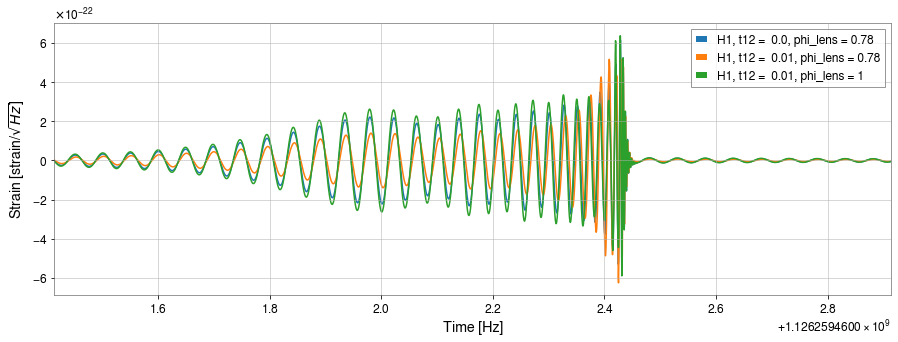

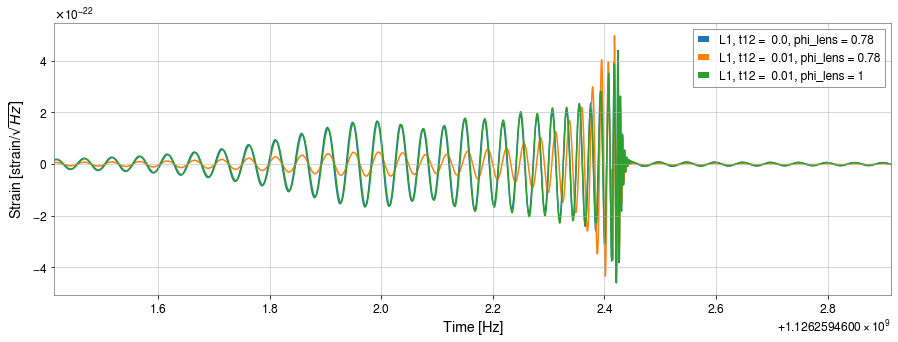

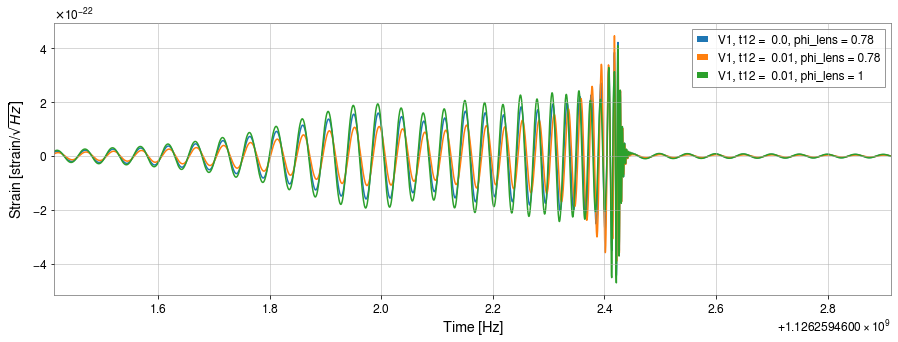

In [7]:
for i in [0,1,2]:
    fig, ax = plt.subplots(figsize=(15,5))

    det = ifos1[i]

    ax.plot(det.strain_data.time_array,
              det.strain_data.time_domain_strain,
              label=str(det.name)+ ', t12 =  '+ str(t12_arr[0])+ ', phi_lens = '+ str(lens_angle_arr[0])[:4])
   
    det = ifos2[i]

    ax.plot(det.strain_data.time_array,
              det.strain_data.time_domain_strain,
              label=str(det.name)+ ', t12 =  '+ str(t12_arr[1])+ ', phi_lens = '+ str(lens_angle_arr[1])[:4])
   
    det = ifos3[i]

    ax.plot(det.strain_data.time_array,
              det.strain_data.time_domain_strain,
              label=str(det.name)+ ', t12 =  '+ str(t12_arr[2])+ ', phi_lens = '+ str(lens_angle_arr[2])[:4])
   
    ax.set_xlabel("Time [Hz]")
    ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
    gps_time= injection_parameters['geocent_time']
    ax.set_xlim(gps_time - 1, gps_time + 0.5)
    ax.legend()
    plt.show()


### Conclusion:
- The waveform is closer to GR waveform when lens_angle = 1 .?



# automate mismatch calculations

In [8]:
from tgrlensing.waveform_model import ModelGenericBeyondGRLensingBBH
waveform_arguments = dict(waveform_approximant='IMRPhenomXHM',
                          reference_frequency=20., minimum_frequency=20.)
sampling_frequency=2048
duration=8
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=ModelGenericBeyondGRLensingBBH,parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,waveform_arguments=waveform_arguments)
#asd_file_HL='/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'
asd_file_HL='/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'

delta_f = 1/8
fhigh = 1024
flen = int(fhigh/delta_f) +1
flow = 20
psd_HL = pycbc.psd.from_txt(asd_file_HL, flen, delta_f,flow, is_asd_file=True)
#psd_file_V='/home/srashti.goyal/.conda/envs/igwn-py37-hanabi/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/AdV_psd.txt'
psd_file_V='/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/bilby/gw/detector/noise_curves/AdV_psd.txt'

psd_V = pycbc.psd.from_txt(psd_file_V, flen, delta_f,flow, is_asd_file=False)

gauss_noise_injection = True
def calc_mismatch_injections(inj_pars1,inj_pars2, waveform_generator,psd_H,psd_L,psd_V,gauss_noise_injection=True,sampling_frequency=2048,duration=8,flow=20,fhigh=1024):
    
    ifos1 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
    ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1','V1'])
    
    if gauss_noise_injection == True :
        ifos1.set_strain_data_from_power_spectral_densities(sampling_frequency=sampling_frequency, duration=duration,
           start_time=inj_pars1['geocent_time'] - 6)
        
    else:

        ifos1.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
           start_time=inj_pars1['geocent_time'] - 6)
    ifos2.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,\
                                          start_time=inj_pars2['geocent_time'] - 6)

    inj1 = ifos1.inject_signal(waveform_generator=waveform_generator,parameters=inj_pars1)
    inj2 = ifos2.inject_signal(waveform_generator=waveform_generator,parameters=inj_pars2)
    ts_1_H1 = ifos1[0].strain_data.to_pycbc_timeseries()
    ts_1_L1 = ifos1[1].strain_data.to_pycbc_timeseries()
    ts_1_V1 = ifos1[2].strain_data.to_pycbc_timeseries()

    ts_2_H1 = ifos2[0].strain_data.to_pycbc_timeseries()
    ts_2_L1 = ifos2[1].strain_data.to_pycbc_timeseries()
    ts_2_V1 = ifos2[2].strain_data.to_pycbc_timeseries()
    
    match_H1, shift_H1 = ts_1_H1.match(ts_2_H1,psd=psd_H,low_frequency_cutoff=flow,high_frequency_cutoff=fhigh)
    match_L1, shift_L1 = ts_1_L1.match(ts_2_L1,psd=psd_L,low_frequency_cutoff=flow,high_frequency_cutoff=fhigh)
    match_V1, shift_V1 = ts_1_V1.match(ts_2_V1,psd=psd_V,low_frequency_cutoff=flow,high_frequency_cutoff=fhigh)
    return np.array([1-match_H1,1-match_L1,1-match_V1]), np.array([shift_H1,shift_L1,shift_V1]),np.array([ifos1,ifos2])

18:31 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: tgrlensing.waveform_model.ModelGenericBeyondGRLensingBBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [9]:
import logging
logger = bilby.core.utils.logger
logger.disabled = True

## snr 40

In [10]:
injection_parameters=dict(mass_1 = 38.3, mass_2 = 33.19, \
                          luminosity_distance = 2*558.553,\
                          dec = -1.223, ra = 2.269, theta_jn = 2.921,\
                          chi_1 = 0.3, chi_2 = 0.27, psi = 1.575,\
                          phase = 1.893,geocent_time = 1126259462.414,\
                          t12= 0,lens_angle= 0)

inj_pars1 = injection_parameters.copy()
inj_pars2 = injection_parameters.copy()
inj_pars2['t12'] = 0.01
inj_pars2['lens_angle']=1
mismatchs,shifts,ifos =calc_mismatch_injections(inj_pars1,inj_pars2, waveform_generator,psd_HL,psd_HL,psd_V,gauss_noise_injection=True)
mismatchs,shifts

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


(array([0.76521178, 0.82274099, 0.86044362]), array([0, 0, 0]))

In [11]:
t12_arr = np.linspace(-0.1,0.,101)

In [12]:
mismatchs_arr = np.zeros([len(t12_arr),3])
shifts_arr = np.zeros([len(t12_arr),3])

In [13]:
for i,t12 in enumerate(t12_arr):
    inj_pars1 = injection_parameters.copy()
    inj_pars2 = injection_parameters.copy()
    inj_pars2['t12'] = t12
    inj_pars2['lens_angle']=np.pi/4
    mismatchs,shifts,ifos =calc_mismatch_injections(inj_pars1,inj_pars2, waveform_generator,psd_HL,psd_HL,psd_V,gauss_noise_injection=False)
    mismatchs_arr[i,:],shifts_arr[i,:] =  mismatchs,shifts

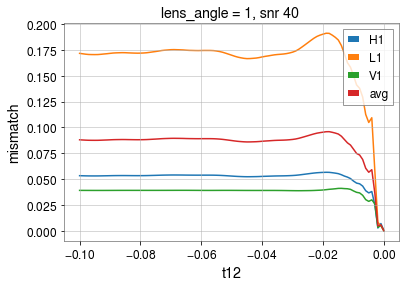

In [14]:
plt.plot(t12_arr,mismatchs_arr[:,0],label='H1')
plt.plot(t12_arr,mismatchs_arr[:,1],label='L1')
plt.plot(t12_arr,mismatchs_arr[:,2],label='V1')
plt.plot(t12_arr,mismatchs_arr.sum(axis=1)/3,label='avg')
plt.xlabel('t12')
plt.ylabel('mismatch')
plt.title('lens_angle = 1, snr 40 ')
plt.legend()
plt.show()

## snr 20

In [15]:
injection_parameters=dict(mass_1 = 38.3, mass_2 = 33.19, \
                          luminosity_distance = 4*558.553,\
                          dec = -1.223, ra = 2.269, theta_jn = 2.921,\
                          chi_1 = 0.3, chi_2 = 0.27, psi = 1.575,\
                          phase = 1.893,geocent_time = 1126259462.414,\
                          t12= 0,lens_angle= 0)

inj_pars1 = injection_parameters.copy()
inj_pars2 = injection_parameters.copy()
inj_pars2['t12'] = 0.01
inj_pars2['lens_angle']=1
mismatchs,shifts,ifos =calc_mismatch_injections(inj_pars1,inj_pars2, waveform_generator,psd_HL,psd_HL,psd_V,gauss_noise_injection=True)
mismatchs,shifts

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


(array([0.87958511, 0.89081432, 0.9180017 ]), array([0, 0, 0]))

In [16]:
t12_arr = np.linspace(-0.1,0.,101)

In [17]:
mismatchs_arr = np.zeros([len(t12_arr),3])
shifts_arr = np.zeros([len(t12_arr),3])

In [18]:
for i,t12 in enumerate(t12_arr):
    inj_pars1 = injection_parameters.copy()
    inj_pars2 = injection_parameters.copy()
    inj_pars2['t12'] = t12
    inj_pars2['lens_angle']=np.pi/4
    mismatchs,shifts,ifos =calc_mismatch_injections(inj_pars1,inj_pars2, waveform_generator,psd_HL,psd_HL,psd_V,gauss_noise_injection=False)
    mismatchs_arr[i,:],shifts_arr[i,:] =  mismatchs,shifts

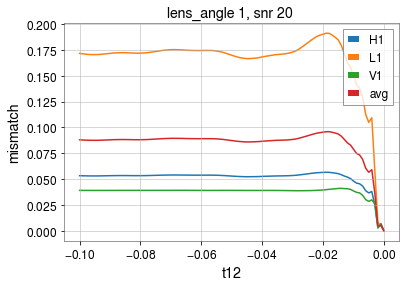

In [19]:
plt.plot(t12_arr,mismatchs_arr[:,0],label='H1')
plt.plot(t12_arr,mismatchs_arr[:,1],label='L1')
plt.plot(t12_arr,mismatchs_arr[:,2],label='V1')
plt.plot(t12_arr,mismatchs_arr.sum(axis=1)/3,label='avg')
plt.xlabel('t12')
plt.ylabel('mismatch')
plt.title('lens_angle 1, snr 20 ')
plt.legend()
plt.show()